In [95]:
# import pandas for data wrangling
import time

import pandas as pd


# import numpy for Scientific computations
import numpy as np


# import machine learning libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score


# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import os

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from xgboost import XGBRegressor

print(os.getcwd())
!nvidia-smi

C:\Users\Udi\Documents\GitHub\RadiationProject\beta_prediction
Tue Jul  5 13:19:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.59       Driver Version: 516.59       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8    10W /  N/A |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                         

In [96]:
data = 'data/cclebeta.csv'
data_x = pd.read_csv('data/train_X_beta.csv', index_col=0)
data_y = pd.read_csv('data/train_y_beta.csv', index_col=0)
df = pd.read_csv(data, index_col=0)
df.shape

(494, 18524)

In [97]:
data_y.describe()

,Beta
count,4.440000e+02
mean,8.424858e-03
std,1.253332e-02
min,2.642000e-11
25%,7.669000e-08
50%,4.550500e-05
75%,1.529500e-02
max,6.135000e-02


In [98]:
X = data_x[['1026', '4680', '83468', '23242', '56034', '84141', '1825', '8204', '91947', '27324', '5325', '81792', '195814', '23052', '26136', '26103', '11227', '1294', '9966', '169834', '100129196', '100128098', '200159', '163183', '56925', '146713', '10653', '26080', '355', '5816', '3883', '283352', '8518', '857', '56180', '339976', '8125', '3400', '255743', '54221', '90161', '100506606', '51706', '400940', '79836', '3625', '144406', '9014', '7739', '11254', '83450', '9607', '339535', '119395', '412', '256764', '3859', '140886', '92421', '84152', '124093', '11136', '79083', '1795', '261734', '57732', '6558', '132430', '650794', '643616', '388698', '7045', '162494', '399949', '79822', '57619', '9615', '1509', '57787', '1365', '118426', '84692', '767', '5720', '100653022', '84752', '7803', '65059', '160857', '55286', '7369', '55752', '8418', '9369', '79602', '286827', '54716', '128025', '114788', '6662', '2203', '10962', '6502', '79166', '27342', '6764', '400566', '222696', '26577', '64208', '286530', '6319', '26164', '57001', '54545', '7103', '7070', '54935', '222962', '5172', '29988', '151278', '23464', '9488', '5617', '132321', '7403', '776', '586', '30009', '29761', '573', '1734', '7032', '10170', '4100', '79838', '2312', '57459', '27020', '57480', '148109', '56659', '5217', '9961', '54751', '3713', '162966', '283576', '5519', '92292', '4885', '285386', '130940', '79400', '339803', '54520', '306', '65983', '65055', '282980', '112942', '4065', '389289', '6566', '5342', '389932', '118430', '135152', '65109', '732253', '8521', '100292680', '9692', '91646', '642636', '282775', '57169', '9768', '6338', '8504', '140686', '57710', '164684', '55217', '81853', '729967', '83887', '6275', '131616', '51806', '10866', '256227', '10473', '339988', '30010', '55283', '50840', '9696', '9099', '9093', '135932', '26999', '4126', '10548', '84766', '116123', '3934', '7844', '7766', '54842', '203414', '2067', '285313', '55268', '100506530', '9514', '6457', '126661', '55425', '378828', '80727', '3069', '10551', '339210', '9289', '55297', '65990', '640', '51450', '3615', '196993', '11068', '404201', '7031', '170712', '64425', '996', '3157', '79776', '5927', '3741', '4660', '280665', '3767', '64651', '85509', '9757', '563', '4781', '27236', '8365', '100133319', '2566', '123041', '10265', '128486', '9532', '64843', '10628', '10010', '51146', '91120', '8349', '54682', '151176', '54457', '284083', '60509', '10742', '341676', '84525', '369', '1284', '4938', '4250', '7515', '6549', '7341', '339366', '7832', '6091', '63933', '10875', '4633', '100507670', '3875', '6422', '1293', '202333', '399665', '8975', '51010', '1832', '7762', '4905', '80144', '493869', '729', '799', '57150', '86', '84830', '5573', '250', '80237', '84319', '27101', '2259', '9245', '55076', '1462', '130560', '8828', '2799', '340252', '51660', '9806', '5982', '1290', '85016', '57546', '597', '25996', '6947', '401588', '79027', '6820', '8707', '286046', '5118', '117531', '79183', '285855', '5054', '79152', '51060', '80853', '400748', '6368', '285957', '10463', '4151', '7345', '284361', '84318', '51351', '100131510', '1434', '119710', '27122', '9754', '100505696', '1289', '54915', '81696', '140606', '6160', '653238', '400793', '2644', '7913', '140738', '2706', '1545', '80032', '8480', '22903', '94081', '4199', '375484', '90139', '3817', '154214', '2321', '388564', '57758', '307', '26227', '51738', '3422', '115106', '1308', '2196', '55607', '150005', '64782']]

# X = data_x[['162966', '86', '1832', '54842', '84830', '5054', '91120', '9768', '4660', '84319', '56180', '3859', '27236', '135932', '170712', '27342', '6091', '57169', '7739', '51010', '54751', '51146', '8349', '4151', '64782', '7844', '54221', '195814', '130940', '23242', '6502', '643616', '91947', '116123', '57546', '11254', '27101', '100505696', '140606', '6422', '4126', '256227', '8521', '4199', '8204', '1734', '169834', '64843', '6319', '7913', '586', '339976', '81853', '7762', '144406', '60509', '1294', '222696', '30010', '2706', '285386', '100131510', '7032', '9754', '222962', '51060', '285957', '84318', '8365', '151278', '2259', '10742', '369', '5927', '5617', '339803', '10866', '280665', '57150', '375484', '9369', '26999', '9488', '2799', '6368', '6662', '732253', '8418', '57480', '150005', '90139', '64425', '4905', '7832', '339366', '80853', '7766', '203414', '2196', '130560', '164684', '340252', '5118', '63933', '10628', '84766', '4938', '653238', '10548', '307', '64651', '286046', '196993', '339988', '6457', '4065', '8828', '10265', '51450', '55607', '404201', '100133319', '10010', '401588', '85509', '799', '8707', '51351', '2644', '57758', '3422', '7515', '400793', '79776', '1293', '4250', '3741', '341676', '7341', '51738', '1308', '154214', '80144', '5982', '563', '128486', '94081', '26227', '2566', '285855', '140738', '51660', '284361', '597', '27122', '1434', '85016', '79027', '400748', '1545', '55076', '80032', '2321', '6160', '6820', '22903', '79183', '1289', '115106', '54915', '119710', '1462']]

y = data_y['Beta'].apply(lambda x:x*100)

In [99]:
len(data_y)

444

In [100]:
print(data_y.median())
print(y.median())

Beta    0.000046
dtype: float64
0.0045505


In [101]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'max_depth': [1,2,3]
        }

linsvrparams = param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [102]:
training_features, testing_features, training_target, testing_target = \
            train_test_split(X, y, random_state=123, test_size=0.2)

In [103]:
# training_features.type

In [104]:
from sklearn.svm import LinearSVR
from tpot.builtins import StackingEstimator
from sklearn.pipeline import make_pipeline
folds = 15
param_comb = 1



# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# xgb = XGBRegressor(learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=1000, n_jobs=20, objective="reg:squarederror", subsample=0.7500000000000001, verbosity=1, tree_method='gpu_hist')

xgb = XGBRegressor()
linsvr = LinearSVR()

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LinearSVR(C=0.01, dual=False, epsilon=0.0001, loss="squared_epsilon_insensitive", tol=0.001)),
    XGBRegressor(learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.7500000000000001, verbosity=0)
)
# exported_pipeline.get_params().keys()

In [105]:

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=15, verbose=3, random_state=1001 )

# Here we go
start_time = time.time() # timing starts from this point for "start_time" variable
random_search.fit(training_features, training_target)
end_time = time.time()# timing ends here for "start_time" variable
print("Time taken for RandomizedSearchCV: {} minutes".format((end_time - start_time)/60))

Fitting 15 folds for each of 1 candidates, totalling 15 fits


C:\Users\Udi\Documents\GitHub\RadiationProject\venv\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Time taken for RandomizedSearchCV: 0.015084818998972575 minutes


In [106]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([0.17089106]), 'std_fit_time': array([0.00694206]), 'mean_score_time': array([0.]), 'std_score_time': array([0.]), 'param_subsample': masked_array(data=[0.4],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[2],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.5],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_colsample_bytree': masked_array(data=[0.6],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'subsample': 0.4, 'min_child_weight': 2, 'max_depth': 3, 'gamma': 0.5, 'colsample_bytree': 0.6}], 'split0_test_score': array([nan]), 'split1_test_score': array([nan]), 'split2_test_score': array([nan]), 'split3_test_score':

In [107]:
predictions = random_search.predict(testing_features)


RMSE :  1.212918
Slope: 0.0033854365131768377
Intercept: 0.005647157139585016
R-Squared: 0.20493831973583904
P-Value: 8.419990031467945e-06
Standard Error: 0.000714897656031181


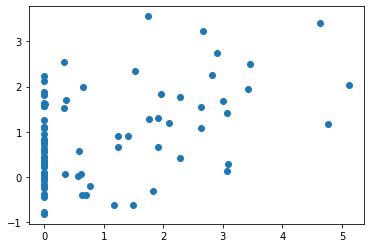

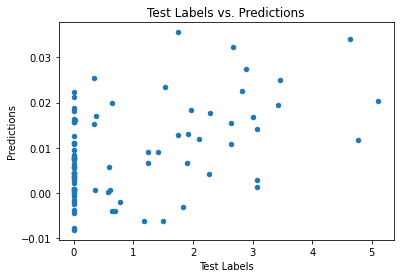

In [108]:
from sklearn.metrics import mean_squared_error as MSE
from matplotlib import pyplot as plt

rmse = np.sqrt(MSE(testing_target, predictions))
print("RMSE : % f" %(rmse))
# R2 Computation
import scipy.stats as stats
# print(y_test.tolist())
# print(y_pred_list)
plt.plot(testing_target, predictions, 'o')
plotting_df = pd.DataFrame()
plotting_df['Actual'] = testing_target
plotting_df['Predicted'] = predictions/100
# plotting_df.to_csv('../data/plotting.csv')
plotting_df.plot(x='Actual', y='Predicted', kind='scatter')

#a, b = np.polyfit(test_with_zeroes, results_zeroes2/100, 1)
#plt.plot(test_with_zeroes, a*test_with_zeroes+b, color='steelblue', linestyle='--', linewidth=2)
slope, intercept, r_value, p_value, std_err = stats.linregress(testing_target, predictions/100)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-Squared:", r_value*r_value)
print("P-Value:", p_value)
print("Standard Error:", std_err)
plt.xlabel('Test Labels')
plt.ylabel('Predictions')
plt.title('Test Labels vs. Predictions')
plt.show()

In [109]:
testing_target.describe()

count    8.900000e+01
mean     8.881730e-01
std      1.298477e+00
min      2.074000e-08
25%      4.690000e-06
50%      6.022000e-05
75%      1.742000e+00
max      5.109000e+00
Name: Beta, dtype: float64

In [110]:
len(testing_target)

89

In [111]:
import joblib

joblib.dump(random_search, '097r.pkl')

['097r.pkl']